# Time Series

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [454]:
sns.set_style('whitegrid')
#plt.style.use('1')
plt.style.available
plt.style.use('ggplot')

## 1. Date and Time Data Types and Tools

In [455]:
from datetime import datetime

In [456]:
now=datetime.now()
now

datetime.datetime(2021, 3, 21, 14, 33, 10, 996302)

In [457]:
now.year,now.month,now.day

(2021, 3, 21)

In [458]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [459]:
delta.days

926

In [460]:
delta.seconds

56700

In [461]:
from datetime import timedelta

In [462]:
start=datetime(2011,1,7)
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [463]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [464]:
stamp=datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [465]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [466]:
value='2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [467]:
datestrs=['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [468]:
from dateutil.parser import parse

In [469]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

Very clever

In [470]:
parse('Jan 31,1997,10:45 PM')

datetime.datetime(2021, 1, 31, 22, 45)

In [471]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [472]:
datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [473]:
idx=pd.to_datetime(datestrs+[None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [474]:
idx[2] # NaT: Not a Time

NaT

In [475]:
pd.isnull(idx)

array([False, False,  True])

## 2. Time Series Basics

In [476]:
from datetime import datetime

In [477]:
dates=[datetime(2011,1,2),datetime(2011,1,5),
       datetime(2011,1,7),datetime(2011,1,8),
       datetime(2011,1,10),datetime(2011,1,12)]
ts=pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.385197
2011-01-05    0.404650
2011-01-07   -0.413572
2011-01-08    0.373844
2011-01-10    0.607741
2011-01-12    1.656671
dtype: float64

DatetimeIndex

In [478]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [479]:
ts+ts[::2]

2011-01-02   -0.770394
2011-01-05         NaN
2011-01-07   -0.827144
2011-01-08         NaN
2011-01-10    1.215481
2011-01-12         NaN
dtype: float64

In [480]:
ts.index.dtype

dtype('<M8[ns]')

In [481]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [482]:
ts

2011-01-02   -0.385197
2011-01-05    0.404650
2011-01-07   -0.413572
2011-01-08    0.373844
2011-01-10    0.607741
2011-01-12    1.656671
dtype: float64

In [483]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [484]:
ts.index[2]

Timestamp('2011-01-07 00:00:00')

In [485]:
stamp=ts.index[2]
ts[stamp]

-0.4135719255663938

In [486]:
ts['2011-01-08']

0.3738439345289923

In [487]:
ts['1/8/2011']

0.3738439345289923

In [488]:
ts['20110108']

0.3738439345289923

In [489]:
longer_ts=pd.Series(np.random.randn(1000),
                    index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01    2.099569
2000-01-02    0.452297
2000-01-03   -0.237894
2000-01-04   -0.801630
2000-01-05   -0.946658
                ...   
2002-09-22   -0.625185
2002-09-23   -0.103831
2002-09-24    0.826437
2002-09-25   -2.480949
2002-09-26    0.581423
Freq: D, Length: 1000, dtype: float64

In [490]:
longer_ts['2001']

2001-01-01    1.561413
2001-01-02   -1.571931
2001-01-03    1.742735
2001-01-04   -2.493631
2001-01-05   -0.632764
                ...   
2001-12-27   -0.707388
2001-12-28   -1.058570
2001-12-29   -1.677929
2001-12-30    0.890424
2001-12-31   -0.771469
Freq: D, Length: 365, dtype: float64

In [491]:
longer_ts['2001-05']

2001-05-01    0.360687
2001-05-02    0.736949
2001-05-03    0.111754
2001-05-04    0.667798
2001-05-05   -0.716345
2001-05-06   -0.701834
2001-05-07   -1.954004
2001-05-08    0.879091
2001-05-09   -0.786275
2001-05-10   -1.713580
2001-05-11    0.559617
2001-05-12    0.237341
2001-05-13    0.977433
2001-05-14    0.796192
2001-05-15    0.276507
2001-05-16   -0.392511
2001-05-17    0.818199
2001-05-18    1.817097
2001-05-19    0.583683
2001-05-20    0.221857
2001-05-21   -2.616814
2001-05-22    0.393276
2001-05-23   -1.588212
2001-05-24    0.983496
2001-05-25   -0.682510
2001-05-26    1.396418
2001-05-27   -0.724777
2001-05-28   -0.740221
2001-05-29   -0.687220
2001-05-30    0.362843
2001-05-31   -2.291286
Freq: D, dtype: float64

In [492]:
ts[datetime(2011,1,7):]

2011-01-07   -0.413572
2011-01-08    0.373844
2011-01-10    0.607741
2011-01-12    1.656671
dtype: float64

In [493]:
ts

2011-01-02   -0.385197
2011-01-05    0.404650
2011-01-07   -0.413572
2011-01-08    0.373844
2011-01-10    0.607741
2011-01-12    1.656671
dtype: float64

In [494]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.413572
2011-01-08    0.373844
2011-01-10    0.607741
dtype: float64

In [495]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.385197
2011-01-05    0.404650
2011-01-07   -0.413572
2011-01-08    0.373844
dtype: float64

In [496]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')    # every Wednesday
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [497]:
long_df=pd.DataFrame(np.random.randn(100,4),
                     index=dates,
                     columns=['colorado','texas','new york','ohio'])
long_df

,colorado,texas,new york,ohio
2000-01-05,2.661160,1.090536,0.654079,2.865513
2000-01-12,0.173333,-1.011652,0.692701,-1.468537
2000-01-19,-0.418624,-0.615499,2.090112,-0.929920
2000-01-26,0.142075,-0.891056,-0.343432,0.067281
2000-02-02,-0.002070,1.961605,-1.410319,-0.303401
...,...,...,...,...
2001-10-31,0.397937,0.162661,-0.957103,-1.120945
2001-11-07,0.669037,-0.544489,-0.200587,0.399840
2001-11-14,0.467775,-0.621108,-0.812794,-1.405627
2001-11-21,-0.785068,1.662768,-0.048157,-0.225651


In [498]:
long_df.loc['2001-5']

,colorado,texas,new york,ohio
2001-05-02,0.127548,-1.015413,0.899330,0.392405
2001-05-09,1.416509,-0.291846,-1.024049,-0.853409
2001-05-16,-0.536729,0.099524,0.326468,-0.488805
2001-05-23,-0.081577,-1.146180,-2.029634,-0.242104
2001-05-30,0.637323,1.955353,-0.336499,-0.971671


### Time Series with Duplicate Indices

In [499]:
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts=pd.Series(np.arange(5),
                 index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [500]:
dup_ts.index.is_unique

False

In [501]:
dup_ts['1/3/2000']

4

In [502]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [503]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [504]:
dup_ts.groupby(level=0).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

## 3. Date Ranges, Frequencies, and Shifting

In [505]:
ts

2011-01-02   -0.385197
2011-01-05    0.404650
2011-01-07   -0.413572
2011-01-08    0.373844
2011-01-10    0.607741
2011-01-12    1.656671
dtype: float64

In [506]:
resampler=ts.resample('D') # daily frequency
resampler

### Generating Date Ranges

In [507]:
index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [508]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [509]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

`start` and `end` are inclusive

In [510]:
pd.date_range('2000-01-01','2000-12-01',freq='BM') # business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [511]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [512]:
pd.date_range('2012-05-02 12:56:31',periods=5,freq='S')

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-02 12:56:32',
               '2012-05-02 12:56:33', '2012-05-02 12:56:34',
               '2012-05-02 12:56:35'],
              dtype='datetime64[ns]', freq='S')

normalize : bool, default False

    Normalize start/end dates to midnight before generating date range.

In [513]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [514]:
from pandas.tseries.offsets import Hour,Minute

In [515]:
hour=Hour()
hour

<Hour>

In [516]:
four_hours=Hour(4)
four_hours

<4 * Hours>

Putting an integer before the base frequency creates a multiple:
    
    `H`
    `4H`

In [517]:
pd.date_range('2000-01-01','2001-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', length=2214, freq='4H')

In [518]:
Hour(2)+Minute(30)

<150 * Minutes>

In [519]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates

In [520]:
rng=pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')     # the third Friday of each month
rng     

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Shifting (Leading and Lagging) Data

In [521]:
ts=pd.Series(np.random.randn(4),
             index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31    0.388447
2000-02-29    0.147681
2000-03-31    0.022357
2000-04-30   -0.131432
Freq: M, dtype: float64

In [522]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.388447
2000-04-30    0.147681
Freq: M, dtype: float64

In [523]:
ts.shift(-2)

2000-01-31    0.022357
2000-02-29   -0.131432
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [524]:
ts/ts.shift(1)-1 # percent changes (x2/x1)-1 or (x2-x1)/x1

2000-01-31         NaN
2000-02-29   -0.619818
2000-03-31   -0.848615
2000-04-30   -6.878887
Freq: M, dtype: float64

In [525]:
(ts-ts.shift(1))/ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.619818
2000-03-31   -0.848615
2000-04-30   -6.878887
Freq: M, dtype: float64

In [526]:
ts

2000-01-31    0.388447
2000-02-29    0.147681
2000-03-31    0.022357
2000-04-30   -0.131432
Freq: M, dtype: float64

In [527]:
ts.shift(2,freq='M')

2000-03-31    0.388447
2000-04-30    0.147681
2000-05-31    0.022357
2000-06-30   -0.131432
Freq: M, dtype: float64

In [528]:
ts.shift(3,freq='D')

2000-02-03    0.388447
2000-03-03    0.147681
2000-04-03    0.022357
2000-05-03   -0.131432
dtype: float64

In [529]:
ts.shift(1,freq='90T') # 1h 30min, T stands for minutes

2000-01-31 01:30:00    0.388447
2000-02-29 01:30:00    0.147681
2000-03-31 01:30:00    0.022357
2000-04-30 01:30:00   -0.131432
dtype: float64

### Shifting dates with offsets

In [530]:
from pandas.tseries.offsets import Day,MonthEnd

In [531]:
now=datetime(2011,11,17)
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [532]:
now+MonthEnd()       # the first increment "rolls forward" a date to the next date according to the frequency rule

Timestamp('2011-11-30 00:00:00')

In [533]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [534]:
offset=MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [535]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [536]:
ts=pd.Series(np.random.randn(20),
             index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15    1.254601
2000-01-19   -1.251893
2000-01-23    0.272904
2000-01-27    0.105273
2000-01-31   -2.765798
2000-02-04    0.032943
2000-02-08   -0.251640
2000-02-12    0.451343
2000-02-16    0.828087
2000-02-20   -1.263696
2000-02-24    0.197716
2000-02-28   -0.110960
2000-03-03   -0.772067
2000-03-07    0.175121
2000-03-11   -0.381693
2000-03-15    1.143872
2000-03-19    0.164286
2000-03-23    0.223963
2000-03-27   -0.519348
2000-03-31    0.012945
Freq: 4D, dtype: float64

In [537]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.476983
2000-02-29   -0.016601
2000-03-31    0.005885
dtype: float64

In [538]:
ts.resample('M').mean()

2000-01-31   -0.476983
2000-02-29   -0.016601
2000-03-31    0.005885
Freq: M, dtype: float64

In [539]:
ts.resample('D').mean()

2000-01-15    1.254601
2000-01-16         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19   -1.251893
                ...   
2000-03-27   -0.519348
2000-03-28         NaN
2000-03-29         NaN
2000-03-30         NaN
2000-03-31    0.012945
Freq: D, Length: 77, dtype: float64

## 4. Periods and Period Arithmetic

In [540]:
p=pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [541]:
p+5

Period('2012', 'A-DEC')

In [542]:
p-2

Period('2005', 'A-DEC')

In [543]:
pd.Period('2014',freq='A-DEC')-p

<7 * YearEnds: month=12>

In [544]:
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')

rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [545]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.878931
2000-02    0.794555
2000-03   -0.541830
2000-04   -0.009985
2000-05   -1.348824
2000-06    0.465558
Freq: M, dtype: float64

In [546]:
values=['2001Q3','2002Q2','2003Q1']

index=pd.PeriodIndex(values,freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [547]:
p=pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [548]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [549]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [550]:
p=pd.Period('2007',freq='A-JUN')

p

Period('2007', 'A-JUN')

In [551]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [552]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [553]:
p=pd.Period('Aug-2007',freq='M')
p

Period('2007-08', 'M')

In [554]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [555]:
rng=pd.period_range('2006','2009',freq='A-DEC')

ts=pd.Series(np.random.randn(len(rng)),
             index=rng)

ts

2006   -0.489742
2007   -0.147219
2008   -0.461627
2009   -0.280355
Freq: A-DEC, dtype: float64

In [556]:
ts.asfreq('M',how='start')

2006-01   -0.489742
2007-01   -0.147219
2008-01   -0.461627
2009-01   -0.280355
Freq: M, dtype: float64

In [557]:
ts.asfreq('B',how='end')      # the last business day of each year

2006-12-29   -0.489742
2007-12-31   -0.147219
2008-12-31   -0.461627
2009-12-31   -0.280355
Freq: B, dtype: float64

### Quarterly Period Frequencies

fiscal year end:
    the last calender or business day of one of the 12 months of the year
    
    eg
    
    freq='Q-JAN'
    
    每年第四季度在当年一月末（31号）结束

In [558]:
p=pd.Period('2012Q4',freq='Q-JAN') # 2012年第四季度在2012年1月结束
p

Period('2012Q4', 'Q-JAN')

In [559]:
p.asfreq('D',how='start') # 显示为2012年第四季度的开始

Period('2011-11-01', 'D')

In [560]:
p.asfreq('D',how='end')

Period('2012-01-31', 'D')

In [561]:
# the second-to-last business day of 2012Q4
p.asfreq('B','end')-1

Period('2012-01-30', 'B')

In [562]:
(p.asfreq('B','end')-1).asfreq('T','start')+16*60

Period('2012-01-30 16:00', 'T')

In [563]:
(p.asfreq('B','end')-1).asfreq('H','start')+16

Period('2012-01-30 16:00', 'H')

In [564]:
p4pm=(p.asfreq('B','end')-1).asfreq('T','start')+16*60
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [565]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [566]:
ts=pd.Series(np.arange(len(rng)),
              index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [567]:
new_rng=(rng.asfreq('B','end')-1).asfreq('T','start')+16*60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [568]:
ts.index=new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [569]:
rng.asfreq('B',how='start')

PeriodIndex(['2010-08-02', '2010-11-01', '2011-02-01', '2011-05-02',
             '2011-08-01', '2011-11-01'],
            dtype='period[B]', freq='B')

### Converting Timestamps to Periods (and Back)

In [570]:
rng=pd.date_range('2000-01-01',periods=3,freq='M')
ts=pd.Series(np.random.randn(3),
             index=rng)
ts

2000-01-31   -0.355491
2000-02-29    0.037478
2000-03-31    0.303358
Freq: M, dtype: float64

In [571]:
pts=ts.to_period()
pts

2000-01   -0.355491
2000-02    0.037478
2000-03    0.303358
Freq: M, dtype: float64

In [572]:
rng=pd.date_range('1/29/2000',periods=6,freq='D')
ts2=pd.Series(np.random.randn(6),
              index=rng)
ts2

2000-01-29   -0.561568
2000-01-30   -1.198728
2000-01-31   -0.939520
2000-02-01   -0.893613
2000-02-02   -1.575253
2000-02-03   -0.815107
Freq: D, dtype: float64

In [573]:
ts2.to_period('M')

2000-01   -0.561568
2000-01   -1.198728
2000-01   -0.939520
2000-02   -0.893613
2000-02   -1.575253
2000-02   -0.815107
Freq: M, dtype: float64

In [574]:
pts=ts2.to_period()
pts

2000-01-29   -0.561568
2000-01-30   -1.198728
2000-01-31   -0.939520
2000-02-01   -0.893613
2000-02-02   -1.575253
2000-02-03   -0.815107
Freq: D, dtype: float64

In [575]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.561568
2000-01-30 23:59:59.999999999   -1.198728
2000-01-31 23:59:59.999999999   -0.939520
2000-02-01 23:59:59.999999999   -0.893613
2000-02-02 23:59:59.999999999   -1.575253
2000-02-03 23:59:59.999999999   -0.815107
Freq: D, dtype: float64

In [576]:
pts.to_timestamp()

2000-01-29   -0.561568
2000-01-30   -1.198728
2000-01-31   -0.939520
2000-02-01   -0.893613
2000-02-02   -1.575253
2000-02-03   -0.815107
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [577]:
data=pd.read_csv('macrodata.txt')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [578]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [579]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [580]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,
                     freq='Q-DEC')

index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [581]:
data.index=index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [582]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 6. Resampling and Frequency Conversion

In [583]:
rng=pd.date_range('2000-01-01',periods=100,freq='D')
# rng
ts=pd.Series(np.random.randn(len(rng)),
             index=rng)
ts

2000-01-01    1.260268
2000-01-02    0.447194
2000-01-03    0.434550
2000-01-04    1.184349
2000-01-05   -0.288366
                ...   
2000-04-05   -0.708545
2000-04-06    0.572916
2000-04-07   -0.463554
2000-04-08    0.230196
2000-04-09   -0.009324
Freq: D, Length: 100, dtype: float64

In [584]:
ts.resample('M').mean()

2000-01-31    0.163971
2000-02-29   -0.255864
2000-03-31   -0.208570
2000-04-30    0.161207
Freq: M, dtype: float64

In [585]:
ts.resample('M',kind='period').mean()

2000-01    0.163971
2000-02   -0.255864
2000-03   -0.208570
2000-04    0.161207
Freq: M, dtype: float64

### Downsampling

In [586]:
rng=pd.date_range('2000-01-01',periods=12,freq='T')

ts=pd.Series(np.arange(12),
             index=rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [587]:
ts.resample(rule='5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [588]:
ts.resample(rule='5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [589]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

<ipython-input-589-3bc55b951048>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min',closed='right',label='right',loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### Open-High-Low-Close (OHLC) resampling

In [590]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [591]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

### Unsampling and Interpolation

In [592]:
frame=pd.DataFrame(np.random.randn(2,4),
                   index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                   columns=['colorado','texas','new york','ohio'])
frame

,colorado,texas,new york,ohio
2000-01-05,0.682539,-0.823222,-0.545062,0.036552
2000-01-12,1.615087,-1.607037,-0.940518,0.779024


In [593]:
df_daily=frame.resample('D').asfreq()
df_daily

,colorado,texas,new york,ohio
2000-01-05,0.682539,-0.823222,-0.545062,0.036552
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.615087,-1.607037,-0.940518,0.779024


In [594]:
frame.resample('D').asfreq().ffill()

,colorado,texas,new york,ohio
2000-01-05,0.682539,-0.823222,-0.545062,0.036552
2000-01-06,0.682539,-0.823222,-0.545062,0.036552
2000-01-07,0.682539,-0.823222,-0.545062,0.036552
2000-01-08,0.682539,-0.823222,-0.545062,0.036552
2000-01-09,0.682539,-0.823222,-0.545062,0.036552
2000-01-10,0.682539,-0.823222,-0.545062,0.036552
2000-01-11,0.682539,-0.823222,-0.545062,0.036552
2000-01-12,1.615087,-1.607037,-0.940518,0.779024


In [595]:
frame.resample('D').ffill()

,colorado,texas,new york,ohio
2000-01-05,0.682539,-0.823222,-0.545062,0.036552
2000-01-06,0.682539,-0.823222,-0.545062,0.036552
2000-01-07,0.682539,-0.823222,-0.545062,0.036552
2000-01-08,0.682539,-0.823222,-0.545062,0.036552
2000-01-09,0.682539,-0.823222,-0.545062,0.036552
2000-01-10,0.682539,-0.823222,-0.545062,0.036552
2000-01-11,0.682539,-0.823222,-0.545062,0.036552
2000-01-12,1.615087,-1.607037,-0.940518,0.779024


In [596]:
frame.resample('D').ffill(limit=2)     # 只填2个missing value

,colorado,texas,new york,ohio
2000-01-05,0.682539,-0.823222,-0.545062,0.036552
2000-01-06,0.682539,-0.823222,-0.545062,0.036552
2000-01-07,0.682539,-0.823222,-0.545062,0.036552
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.615087,-1.607037,-0.940518,0.779024


In [597]:
frame.resample('W-THU').ffill()

,colorado,texas,new york,ohio
2000-01-06,0.682539,-0.823222,-0.545062,0.036552
2000-01-13,1.615087,-1.607037,-0.940518,0.779024


### Resampling with Periods

In [598]:
frame=pd.DataFrame(np.random.randn(24,4),
                   index=pd.period_range('1-2000','12-2001',freq='M'),
                   columns=['colorado','texas','new york','ohio'])
frame

,colorado,texas,new york,ohio
2000-01,-1.282033,0.040025,-0.510716,0.622584
2000-02,-0.508317,-0.034608,2.115345,0.021252
2000-03,-0.265255,-0.577898,-0.706377,1.057313
2000-04,0.312807,0.226947,-0.554309,1.184949
2000-05,2.225431,-0.997415,-1.140331,-0.833258
2000-06,-3.516679,0.340221,0.810905,-1.009482
2000-07,0.170538,-0.559861,-2.095806,0.481651
2000-08,-0.655311,0.109694,-1.148218,1.481321
2000-09,-0.578809,0.545681,-0.695218,0.467695
2000-10,1.078139,-0.037191,1.043104,0.140464


In [599]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,colorado,texas,new york,ohio
2000,-0.004412,-0.365441,-0.412946,0.454311
2001,0.097339,-0.244587,0.100770,-0.005213


In [600]:
# Q-DEC: Quarterly, year ending in Dec
annual_frame.resample('Q-DEC').ffill()

,colorado,texas,new york,ohio
2000Q1,-0.004412,-0.365441,-0.412946,0.454311
2000Q2,-0.004412,-0.365441,-0.412946,0.454311
2000Q3,-0.004412,-0.365441,-0.412946,0.454311
2000Q4,-0.004412,-0.365441,-0.412946,0.454311
2001Q1,0.097339,-0.244587,0.100770,-0.005213
2001Q2,0.097339,-0.244587,0.100770,-0.005213
2001Q3,0.097339,-0.244587,0.100770,-0.005213
2001Q4,0.097339,-0.244587,0.100770,-0.005213


In [601]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,colorado,texas,new york,ohio
2000Q4,-0.004412,-0.365441,-0.412946,0.454311
2001Q1,-0.004412,-0.365441,-0.412946,0.454311
2001Q2,-0.004412,-0.365441,-0.412946,0.454311
2001Q3,-0.004412,-0.365441,-0.412946,0.454311
2001Q4,0.097339,-0.244587,0.100770,-0.005213


In [602]:
annual_frame.resample('Q-MAR').ffill()

,colorado,texas,new york,ohio
2000Q4,-0.004412,-0.365441,-0.412946,0.454311
2001Q1,-0.004412,-0.365441,-0.412946,0.454311
2001Q2,-0.004412,-0.365441,-0.412946,0.454311
2001Q3,-0.004412,-0.365441,-0.412946,0.454311
2001Q4,0.097339,-0.244587,0.100770,-0.005213
2002Q1,0.097339,-0.244587,0.100770,-0.005213
2002Q2,0.097339,-0.244587,0.100770,-0.005213
2002Q3,0.097339,-0.244587,0.100770,-0.005213


## 7. Moving Window Functions

In [603]:
close_px_all=pd.read_csv('stock_px_2.txt',
                         parse_dates=True,index_col=0)
close_px_all[:10]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [604]:
close_px=close_px_all[['AAPL','MSFT','XOM']]
close_px=close_px.resample('B')
# close_px.ffill()[:10]
close_px=close_px.ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


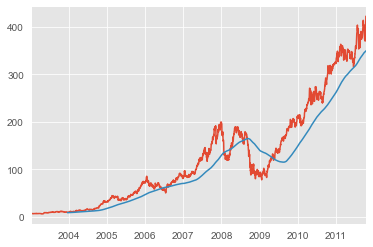

In [605]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot();
# rolling(250): 250-day sliding window
# 250-day moving window average

In [606]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250[:12]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [607]:
close_px.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

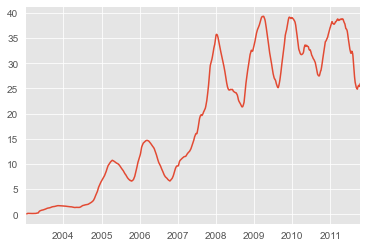

In [608]:
appl_std250.plot();

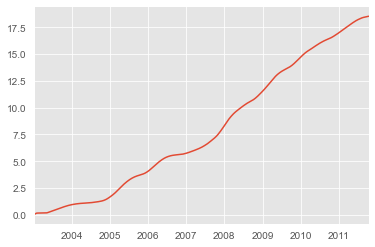

In [609]:
expanding_mean=appl_std250.expanding().mean()
expanding_mean.plot();

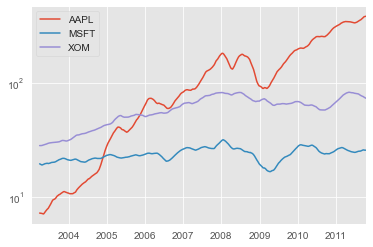

In [614]:
close_px.rolling(60).mean().plot(logy=True);

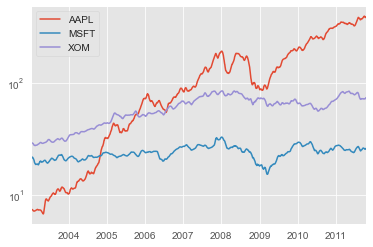

In [616]:
close_px.rolling('20D').mean().plot(logy=True);

In [619]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

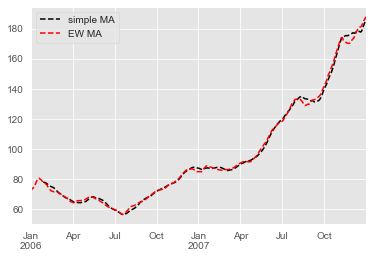

In [627]:
aapl_px=close_px.AAPL['2006':'2007']

# aapl_px
ma60=aapl_px.rolling(30,min_periods=20).mean()
ewma60=aapl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='simple MA')
ewma60.plot(style='r--',label='EW MA')
plt.legend();

### Binary Moving Window Functions

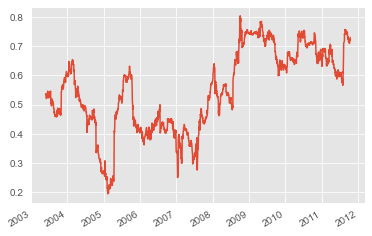

In [630]:
spx_px=close_px_all['SPX']

spx_rets=spx_px.pct_change()

returns=close_px_all.pct_change()

corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

corr.plot();

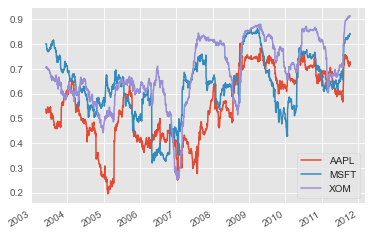

In [634]:
corr=returns[['AAPL','MSFT','XOM']].rolling(125,min_periods=100).corr(spx_rets)
corr.plot();

### User-Defined Moving Window Functions

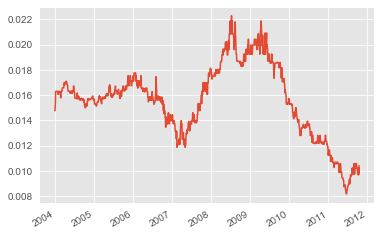

In [639]:
returns.AAPL.rolling(250).quantile(0.75).plot();

In [640]:
from scipy.stats import percentileofscore

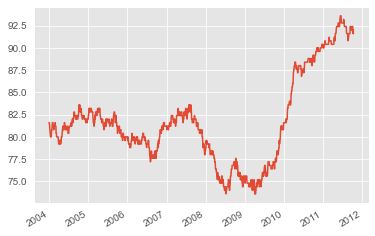

In [641]:
score_at_2percent=lambda x:percentileofscore(x,0.02)
result=returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot();

In [645]:
# 3 在list中的percentile rank
percentileofscore([1,2,3,4,5,6,7,8,9,10],3)

30.0